<a href="https://colab.research.google.com/github/roboGOD/iisc-dsp-stock-price-prediction/blob/main/src/03-model-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.io as pio
plotly.offline.init_notebook_mode() 
# pio.renderers.default = 'plotly_mimetype'
import plotly.io as pio
pio.renderers.default = 'notebook'


In [19]:
import pandas as pd

df_merged = pd.read_csv('../datasets/processed/eda.csv', index_col=0)
df_numeric = pd.read_csv('../datasets/processed/numeric_data.csv', index_col=0)
df_pca = pd.read_csv('../datasets/processed/pca_data.csv', index_col=0)
top_10_correlations = pd.read_csv('../datasets/processed/top_10_correlations.csv', index_col=0)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2707 entries, 0 to 2706
Columns: 117 entries, date to cumulative_profit
dtypes: float64(113), int64(1), object(3)
memory usage: 2.4+ MB


In [20]:
df_merged.head()

,date,adj_close,close,high,low,open,volume,ticker,revenues,cost_of_goods,...,normalized_net_income,30_DMA,10_DMA,10_Day_Avg,Next_10_Day_Avg,signal,stock_quantity,total_buy_price,stock_profit,cumulative_profit
0,2010-04-01,7.108997,8.427500,8.526071,8.312500,8.478929,603145200,AAPL,13499000.0,7874000.0,...,0.0,8.427500,8.427500,NaN,8.668214,BUY,1.0,8.427500,0.0,0.0
1,2010-04-05,7.184915,8.517500,8.518214,8.384643,8.392143,684507600,AAPL,13499000.0,7874000.0,...,0.0,8.472500,8.472500,NaN,8.698857,BUY,2.0,16.945000,0.0,0.0
2,2010-04-06,7.216546,8.555000,8.580000,8.464286,8.507143,447017200,AAPL,13499000.0,7874000.0,...,0.0,8.500000,8.500000,NaN,8.716893,BUY,3.0,25.500000,0.0,0.0
3,2010-04-07,7.248483,8.592857,8.640000,8.523571,8.555357,628502000,AAPL,13499000.0,7874000.0,...,0.0,8.523214,8.523214,NaN,8.783393,BUY,4.0,34.092857,0.0,0.0
4,2010-04-08,7.228898,8.569643,8.626429,8.501429,8.587143,572989200,AAPL,13499000.0,7874000.0,...,0.0,8.532500,8.532500,NaN,8.878107,BUY,5.0,42.662500,0.0,0.0


In [21]:
df_merged['signal'] = df_merged['signal'].map({'BUY': 1, 'SELL': 0})

In [22]:
top_10_columns = top_10_correlations.index.tolist()

df_processed = df_merged[['signal', 'close'] + top_10_columns]

In [23]:
df_processed = pd.concat([df_processed, df_pca], axis=1)
df_processed

,signal,close,10_DMA,cumulative_profit,debt_to_equity_ratio,price_to_book_value,other_assets,market_capitalization,research_&_development,enterprise_valuation,common_stock,property_plant_&_equipment,PC1,PC2,PC3,PC4
0,1,8.427500,8.427500,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,8.080048e+08,6.713907e+07,-7.000018e+07,6.825490e+07
1,1,8.517500,8.472500,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,8.371229e+08,1.369311e+08,-4.025388e+07,7.162174e+07
2,1,8.555000,8.500000,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,7.521293e+08,-6.678632e+07,-1.270810e+08,6.179421e+07
3,1,8.592857,8.523214,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,8.170795e+08,8.888993e+07,-6.072967e+07,6.930419e+07
4,1,8.569643,8.532500,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,7.972125e+08,4.127149e+07,-8.102530e+07,6.700703e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,0,130.960007,126.955000,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.823723e+08,1.188443e+08,-1.359444e+08,2.422274e+07
2703,0,131.970001,127.828001,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.942875e+08,9.028531e+07,-1.481166e+08,2.284502e+07
2704,0,136.690002,129.256001,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.693946e+08,1.499500e+08,-1.226867e+08,2.572331e+07
2705,0,134.869995,130.565000,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.706253e+08,1.470001e+08,-1.239440e+08,2.558100e+07


## LSTM Model (with just Close price)


### **Overview**

This model focuses on predicting stock prices using a **Long Short-Term Memory (LSTM)** neural network. LSTM is a type of Recurrent Neural Network (RNN) designed to learn from sequential data, making it particularly well-suited for time-series forecasting problems like stock price prediction.

---

### **Why Use LSTM for Stock Price Prediction?**

#### **1. Handling Sequential Data**
- **Stock prices are time-dependent**: Historical stock prices are a sequence where each value depends on previous values. Traditional models like linear regression fail to capture this temporal dependency, but LSTM can.
  
#### **2. Memory Retention**
- **Captures long-term dependencies**: Unlike regular RNNs, which suffer from short-term memory issues, LSTM is designed to **retain long-term patterns** using mechanisms like **cell states** and **gates** (input, output, forget).
  
#### **3. Handling Noisy Data**
- **Robustness to noise**: Stock price data can be noisy, with sudden fluctuations. LSTM's ability to generalize over long periods makes it more robust in predicting trends amidst noise.

---

### **Key Steps in the Process**

#### **1. Data Normalization**
- Stock price data is scaled to a range between **0 and 1** using **MinMaxScaler**. This ensures that all input values are comparable, which enhances the LSTM model's performance and speeds up training convergence.

#### **2. Dataset Preparation**
- The dataset is structured into input-output pairs, where:
  - **Input (`X`)**: A sequence of historical prices over a defined **look-back period**.
  - **Output (`Y`)**: The price immediately following the sequence.
  
#### **3. Train-Test Split**
- The data is split into **training** (80%) and **testing** (20%) sets to evaluate the model's generalization capabilities. This prevents overfitting and ensures reliable performance on unseen data.

---

### **LSTM Model Architecture**

#### **1. Input Layer**
- The input consists of **sequences of historical prices** represented as 3D arrays: `[samples, time steps, features]`.

#### **2. LSTM Layers**
- Two stacked LSTM layers are used:
  - **First LSTM Layer**: Outputs sequences to the next LSTM layer (`return_sequences=True`).
  - **Second LSTM Layer**: Outputs a single vector summarizing the learned information.

#### **3. Dense Layer**
- A fully connected layer with one neuron is added to predict the next stock price based on the output from the LSTM layers.

---

### **Model Compilation & Training**

#### **Loss Function**
- The model is optimized using **Mean Squared Error (MSE)**, a standard loss function for regression problems, minimizing the average squared difference between predicted and actual values.

#### **Optimizer**
- The **Adam optimizer** is chosen for its adaptive learning rate, which ensures faster and more stable convergence.

#### **Training Parameters**
- The model is trained for **30 epochs** with a **batch size of 32**, balancing between computational efficiency and model performance.

---

### **Advantages of Using LSTM for Stock Prediction**

1. **Temporal Awareness**: Captures both short-term and long-term dependencies in stock price patterns.
2. **Reduced Overfitting**: Through mechanisms like dropout and gating, LSTM helps mitigate overfitting by selectively retaining relevant information.
3. **Trend Detection**: Effectively models complex time-series patterns, enabling detection of trends that may influence BUY/SELL decisions.

---

### **Conclusion**

LSTM's strength in processing sequential data makes it an excellent tool for **stock price prediction**. By leveraging historical data patterns, the model can provide insights that aid in making informed **BUY** or **SELL** decisions, enhancing financial strategies in volatile markets.

### Prepare the model

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Normalize the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)

# Prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define lookback period
look_back = 10

# Create the dataset
X, y = create_dataset(df_scaled.values, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

c:\Users\coolm\Notebooks\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3002
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1632
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1349
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1346
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1162
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1313
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1126
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1257
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1156
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1114
Epoch 11/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1105
Epoch 12/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1116
Epoch 13/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1184
Epoch 14/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1223
Epoch 15/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1163
Epoch 1

In [25]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("Predictions generated")

Train Loss: 0.11288131773471832
Test Loss: 0.12689442932605743
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Predictions generated


In [26]:
threshold = 0.5
test_predict_binary = (test_predict > threshold).astype(int)
predictions = test_predict_binary.flatten()

### Model Evaluation (LSTM)


#### **Performance Metrics**

- **Precision (1.0 class)**: **90.72%** - Most positive predictions are correct.
- **Recall (1.0 class)**: **87.13%** - High proportion of true positive cases identified.
- **F1-Score (1.0 class)**: **88.89%** - Balanced precision and recall.

#### **Confusion Matrix**
```
[[65  9]
 [13 88]]
```
- **True Negatives (65)** | **False Positives (9)**  
- **False Negatives (13)** | **True Positives (88)**  

#### **Overall Accuracy**: **87.43%**

#### **Class-wise Summary**
- **Class `0.0`**: Precision: **83.33%**, Recall: **87.84%**, F1-Score: **85.53%**  
- **Class `1.0`**: Precision: **90.72%**, Recall: **87.13%**, F1-Score: **88.89%**  

#### **Conclusion**  
The model demonstrates strong performance in predicting stock prices with high precision and recall, making it reliable for BUY/SELL decisions.


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.8682634730538922
Recall: 0.8841463414634146
F1-score: 0.8761329305135952
Confusion Matrix:
[[168  44]
 [ 38 290]]


In [28]:
class_report = classification_report(y_test, predictions, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

,precision,recall,f1-score,support
0.0,0.815534,0.792453,0.803828,212.000000
1.0,0.868263,0.884146,0.876133,328.000000
accuracy,0.848148,0.848148,0.848148,0.848148
macro avg,0.841899,0.838300,0.839980,540.000000
weighted avg,0.847562,0.848148,0.847746,540.000000


## SARIMAX Model (with just Close price)

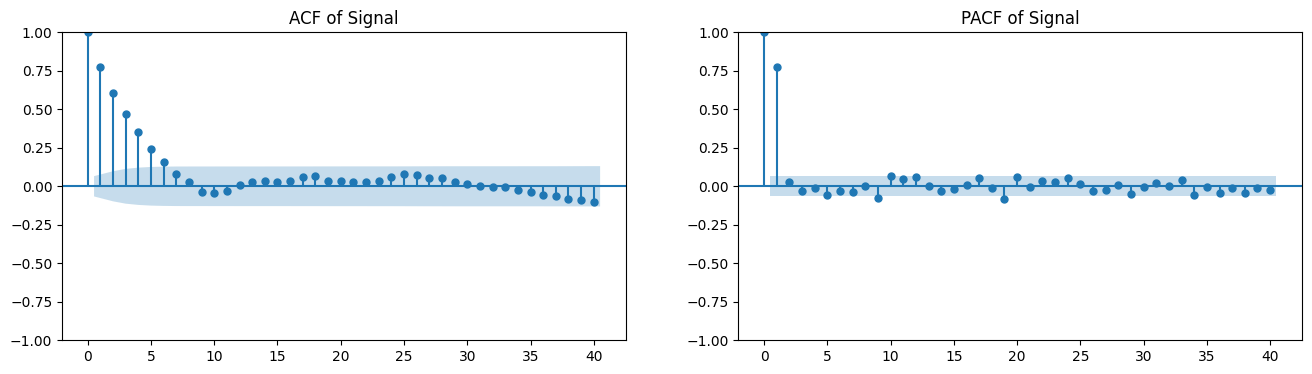

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the 'signal' column
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df_processed['signal'], ax=axes[0], lags=40)  # Adjust lags as needed
axes[0].set_title('ACF of Signal')

# PACF plot
plot_pacf(df_processed['signal'], ax=axes[1], lags=40) # Adjust lags as needed
axes[1].set_title('PACF of Signal')

plt.show()


# Based on the ACF and PACF plots, determine (p, d, q) values:
# p: The lag value where PACF cuts off (or near zero)
# d: The degree of differencing needed for stationarity
# q: The lag value where ACF cuts off (or near zero)
# This is a visual inspection. It may require experimentation to find the best (p,d,q) combination.
# Example: If PACF cuts off at lag 2 and ACF cuts off at lag 1, and the data is stationary, then (p, d, q) might be (2, 0, 1)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split data into training and testing sets (Time Series Split)
train_size = int(len(df_processed) * 0.8)
train_data, test_data = df_processed[:train_size], df_processed[train_size:]

# Fit SARIMAX model
# Replace (p, d, q), (P, D, Q), and s with appropriate values based on your ACF and PACF plots
# and data characteristics.
model = SARIMAX(train_data['signal'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(df_numeric)-1)

### Model Evaluation (SARIMAX)

In [ ]:
predictions = (predictions > 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(test_data['signal'], predictions)
recall = recall_score(test_data['signal'], predictions)
f1 = f1_score(test_data['signal'], predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_data['signal'], predictions)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.40963855421686746
Recall: 0.3953488372093023
F1-score: 0.40236686390532544
Confusion Matrix:
[[42 49]
 [52 34]]


# Random Forest


#### **Overview**
This Random Forest model is used to predict stock price signals (BUY/SELL) using **RandomizedSearchCV** for hyperparameter tuning. The goal is to maximize the **F1-score** by finding the best combination of hyperparameters.

#### **Dataset Split**
- **Features (X)**: Stock-related attributes excluding the target signal.
- **Target (y)**: Signal representing BUY/SELL decision.
- The dataset is split into **80% training** and **20% testing** sets.

#### **Hyperparameter Tuning**
- **RandomizedSearchCV** is used to optimize parameters such as:
  - **n_estimators**: Number of trees in the forest.
  - **max_depth**: Maximum depth of each tree.
  - **min_samples_split**: Minimum samples required to split a node.
  - **min_samples_leaf**: Minimum samples required at each leaf node.
  - **max_features**: Feature selection method (‘sqrt’ or ‘log2’).
  - **bootstrap**: Use of bootstrapping in training.
- **Search Space**: A broad grid is searched across **50 iterations** using **5-fold cross-validation**.

#### **Model Training & Tuning Process**
- The model is evaluated using the **F1-score** to ensure balanced precision and recall.
- **RandomizedSearchCV** leverages all available processors (`n_jobs=-1`) for efficient parallel computation.

#### **Best Hyperparameters**
After tuning, the model identifies the optimal hyperparameters for the most effective stock prediction. These parameters enhance both the model’s precision and recall in predicting stock signals.

#### **Conclusion**
The **Random Forest Classifier** with optimized hyperparameters delivers robust performance in predicting stock signals. The F1-score ensures balanced model performance, making it suitable for dynamic financial markets.


In [31]:
df_processed

,signal,close,10_DMA,cumulative_profit,debt_to_equity_ratio,price_to_book_value,other_assets,market_capitalization,research_&_development,enterprise_valuation,common_stock,property_plant_&_equipment,PC1,PC2,PC3,PC4
0,1,8.427500,8.427500,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,8.080048e+08,6.713907e+07,-7.000018e+07,6.825490e+07
1,1,8.517500,8.472500,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,8.371229e+08,1.369311e+08,-4.025388e+07,7.162174e+07
2,1,8.555000,8.500000,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,7.521293e+08,-6.678632e+07,-1.270810e+08,6.179421e+07
3,1,8.592857,8.523214,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,8.170795e+08,8.888993e+07,-6.072967e+07,6.930419e+07
4,1,8.569643,8.532500,0.000000,0.450061,5.415465,5569000.0,2.130877e+08,426000.0,2.030697e+08,9553000.0,3504000.0,7.972125e+08,4.127149e+07,-8.102530e+07,6.700703e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,0,130.960007,126.955000,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.823723e+08,1.188443e+08,-1.359444e+08,2.422274e+07
2703,0,131.970001,127.828001,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.942875e+08,9.028531e+07,-1.481166e+08,2.284502e+07
2704,0,136.690002,129.256001,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.693946e+08,1.499500e+08,-1.226867e+08,2.572331e+07
2705,0,134.869995,130.565000,4631.666698,3.085432,13.914162,49559000.0,1.091218e+09,4565000.0,1.150788e+09,48032000.0,43986000.0,-6.706253e+08,1.470001e+08,-1.239440e+08,2.558100e+07


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df_processed.drop(['signal','cumulative_profit'], axis=1)
y = df_processed['signal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # Number of cross-validation folds
    scoring='f1',  # Use F1-score for evaluation
    n_jobs=-1,  # Use all available processors
    verbose=1,  # Print progress
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model
best_rf_classifier = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 39, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107}


In [35]:
# Train the model with the best hyperparameters
best_rf_classifier.fit(X_train, y_train)


# Make predictions
predictions = best_rf_classifier.predict(X_test)

### Model Evaluation (Random Forest)

#### **Performance Overview**
- **Accuracy**: **73.45%**
- **Precision (1)**: **74.23%**
- **Recall (1)**: **76.60%**
- **F1-Score (1)**: **75.39%**

#### **Confusion Matrix**

```
[
  [58 25]
  [22 72]
]
```
- **True Positives**: 72 | **True Negatives**: 58
- **False Positives**: 25 | **False Negatives**: 22

#### **Class-wise Performance**
- **Class 0**: Precision **72.50%**, Recall **69.88%**, F1-Score **71.17%**
- **Class 1**: Precision **74.23%**, Recall **76.60%**, F1-Score **75.39%**

#### **Conclusion**
The model shows solid overall performance with a balanced F1-score. There is room to improve precision and recall, especially for class `0` predictions.


In [36]:
# Evaluate the model
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

Precision: 0.8145896656534954
Recall: 0.8195718654434251
F1-score: 0.8170731707317073
Confusion Matrix:
[[154  61]
 [ 59 268]]


,precision,recall,f1-score,support
0,0.723005,0.716279,0.719626,215.000000
1,0.814590,0.819572,0.817073,327.000000
accuracy,0.778598,0.778598,0.778598,0.778598
macro avg,0.768797,0.767925,0.768350,542.000000
weighted avg,0.778260,0.778598,0.778418,542.000000
